In [0]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [0]:
#Zip file contains only the csv, so you can access it directly with read_csv

#df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/diabetic-data-cleaning.zip', 
#                 usecols = ['readmitted','race','gender','age', 'weight', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
#                           'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1' , 'diag_2', 'diag_3', 'number_diagnoses'],
#                compression='zip')

df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/diabetic-data-cleaning.zip',       
                 compression='zip')

#Read through this and figure out what we're doing here
for col in df.describe().columns: 
    nanidx = df[col].sample(frac=np.random.uniform(0.0, 0.001)).index 
    df.loc[nanidx, col] = '?'

# Zip file contains only the csv, so you can access it directly with read_csv df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/diabetic-data-cleaning.zip', compression='zip')
#Read through this and figure out what we're doing here
for col in df.describe().columns: 
    nanidx = df[col].sample(frac=np.random.uniform(0.0, 0.001)).index 
    df.loc[nanidx, col] = '?'

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null object
patient_nbr                 101766 non-null object
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null object
discharge_disposition_id    101766 non-null object
admission_source_id         101766 non-null object
time_in_hospital            101766 non-null object
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null object
num_procedures              101766 non-null object
num_medications             101766 non-null object
number_outpatient           101766 non-null object
number_emergency            101766 non-null object
number_inpatient      

In [267]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [268]:
df.nunique()

encounter_id                101665
patient_nbr                  71451
race                             6
gender                           4
age                             11
weight                          10
admission_type_id                9
discharge_disposition_id        27
admission_source_id             18
time_in_hospital                15
payer_code                      18
medical_specialty               73
num_lab_procedures             119
num_procedures                   8
num_medications                 76
number_outpatient               40
number_emergency                34
number_inpatient                22
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                17
max_glu_serum                    5
A1Cresult                        5
metformin                        5
repaglinide                      5
nateglinide                      5
chlorpropamide                   5
glimepiride         

In [269]:
df['max_glu_serum'].value_counts()

None    96394
Norm     2597
>200     1484
>300     1264
?          27
Name: max_glu_serum, dtype: int64

In [270]:
df['gender'].unique()

array(['Female', 'Male', '?', 'Unknown/Invalid'], dtype=object)

In [0]:
df['gender'] = df['gender'].replace('?','Unknown/Invalid')

In [272]:
df['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [0]:
df['weight'] = df['weight'].replace('?',np.NaN)

In [274]:
df['weight'].value_counts()

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

In [275]:
df['time_in_hospital'] = df['time_in_hospital'].replace('?',np.NaN)
df['time_in_hospital'].unique()


array([ 1.,  3.,  2.,  4.,  5., 13., 12.,  9.,  7., 10.,  6., 11.,  8.,
       14., nan])

In [276]:
df['weight'].unique()


array([nan, '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

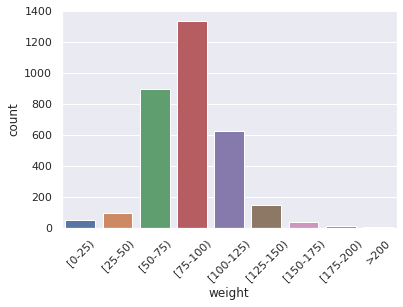

In [277]:
sns.countplot(df['weight'], order = ['[0-25)','[25-50)','[50-75)','[75-100)','[100-125)', '[125-150)','[150-175)','[175-200)','>200'])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

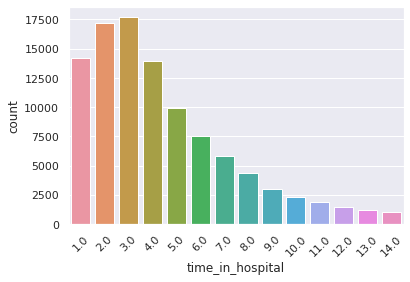

In [278]:
sns.countplot(df['time_in_hospital'])
plt.xticks(rotation=45)

In [0]:
df.replace('?', np.nan, inplace=True)

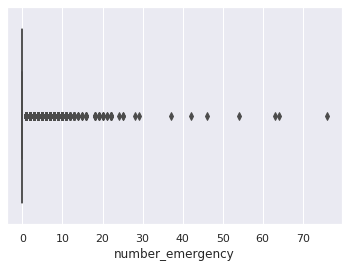

In [280]:
sns.boxplot(df["number_emergency"])

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


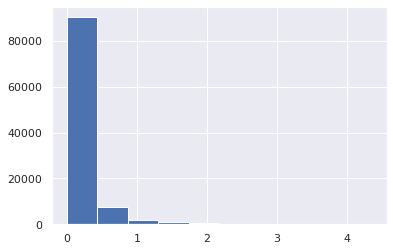

In [281]:
plt.hist(np.log(df["number_emergency"] + 1))
plt.show()

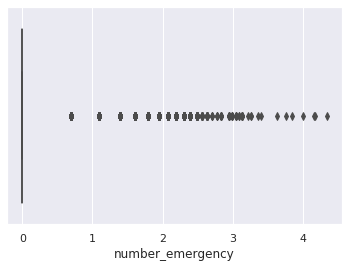

In [282]:
sns.boxplot(np.log(df["number_emergency"] + 1))
plt.show()

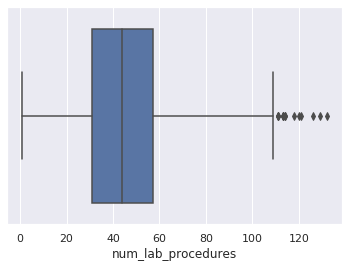

In [283]:
sns.boxplot(df["num_lab_procedures"], whis=2)
plt.show()

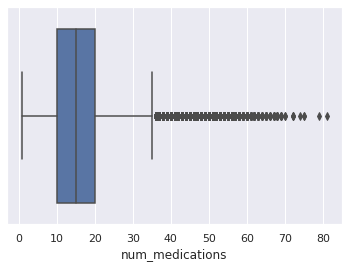

In [284]:
sns.boxplot(df["num_medications"])
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


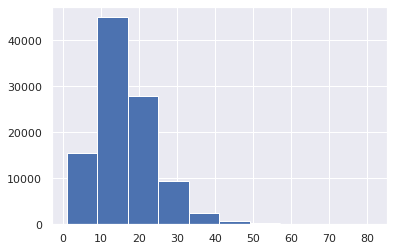

In [285]:
plt.hist(df["num_medications"])
plt.show()

#In your pair, pick one of your notebooks to start from and work ahead on the diabetes data set, assuming your outcome variable is ‘readmitted’, and making it binary where ‘NO’ is 0 and any other value is 1

In [0]:
df['readmitted'] = np.where(df['readmitted'] == 'NO', 0,1)

In [287]:
df['readmitted'].unique

<bound method Series.unique of 0         0
1         1
2         0
3         0
4         0
         ..
101761    1
101762    0
101763    0
101764    0
101765    0
Name: readmitted, Length: 101766, dtype: int64>

#Determine relationships between your input variables and your outcome. Which features have the strongest relationship?

Continuous - continuous: correlation matrix

Continuous - categorical: T-test, ANOVA, etc. i.e. statistical significance tests

Categorical - categorical: Chi-square test

In [288]:
# continuous - continuous
df.corr()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
encounter_id,1.000000,0.512183,-0.158818,-0.132721,-0.112497,-0.062200,-0.026008,-0.014419,0.076054,0.103823,0.082780,0.030924,0.265203,-0.038507
patient_nbr,0.512183,1.000000,-0.010997,-0.136870,-0.032787,-0.023845,0.015794,-0.015568,0.020632,0.103373,0.062202,0.012284,0.226760,0.074007
admission_type_id,-0.158818,-0.010997,1.000000,0.083435,0.106673,-0.012549,-0.143492,0.129959,0.079422,0.026619,-0.018969,-0.038057,-0.117057,-0.004460
discharge_disposition_id,-0.132721,-0.136870,0.083435,1.000000,0.018152,0.162869,0.023474,0.015952,0.108655,-0.008725,-0.024463,0.020826,0.046855,-0.014795
admission_source_id,-0.112497,-0.032787,0.106673,0.018152,1.000000,-0.007022,0.048888,-0.135305,-0.054794,0.027112,0.059845,0.036222,0.071975,0.040113
time_in_hospital,-0.062200,-0.023845,-0.012549,0.162869,-0.007022,1.000000,0.318601,0.191774,0.466258,-0.008887,-0.010085,0.073415,0.220172,0.051196
num_lab_procedures,-0.026008,0.015794,-0.143492,0.023474,0.048888,0.318601,1.000000,0.058075,0.268097,-0.007685,-0.002217,0.039404,0.152784,0.039271
num_procedures,-0.014419,-0.015568,0.129959,0.015952,-0.135305,0.191774,0.058075,1.000000,0.385899,-0.024920,-0.038303,-0.066225,0.073803,-0.044793
num_medications,0.076054,0.020632,0.079422,0.108655,-0.054794,0.466258,0.268097,0.385899,1.000000,0.045253,0.013248,0.064274,0.261571,0.046667
number_outpatient,0.103823,0.103373,0.026619,-0.008725,0.027112,-0.008887,-0.007685,-0.024920,0.045253,1.000000,0.091375,0.107246,0.094283,0.082047


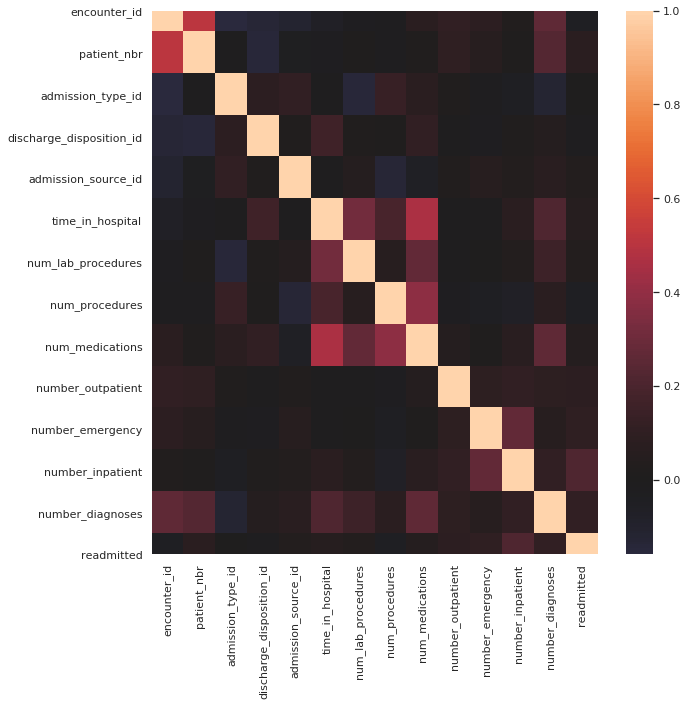

In [289]:
# heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), center = 0)
plt.show()

#Look at relationships between your input variables. Many models assume that your input variables are independent of each other. How true is that for this data set?

**Continuous - continuous: correlation matrix**

num_lab_procedures is correlated to num_procedures

num_medications is correlated to time_in_hospital

num_medications is correlated to number_diagnoses

**Continuous - categorical:**



**Categorical - categorical**

The following tested are independent:

age to weight

race to weight

gender to age 


In [290]:
df['max_glu_serum'].value_counts()
df['max_glu_serum'].dropna()

0         None
1         None
2         None
3         None
4         None
          ... 
101761    None
101762    None
101763    None
101764    None
101765    None
Name: max_glu_serum, Length: 101739, dtype: object

In [291]:
# Continuous to categorical: t-test, ANOVA or boxen
# Categorical max_glu_serum , diabetesMed, time_in_hospital
df['ordinal_max_glu_serum'] = df['max_glu_serum'].map({'None': 0, 'Norm': 1, '>200': 2, '>300': 3})
df['ordinal_max_glu_serum'].value_counts()

0.0    96394
1.0     2597
2.0     1484
3.0     1264
Name: ordinal_max_glu_serum, dtype: int64

In [292]:
stats.shapiro(df['ordinal_max_glu_serum'].sample(5000))

(0.22014498710632324, 0.0)

In [293]:
stats.normaltest(df['ordinal_max_glu_serum'].sample(4000))

NormaltestResult(statistic=nan, pvalue=nan)

In [294]:
# Categorical ordinal_ max_glu_serum, time_in_hospital
stats.mannwhitneyu(df['ordinal_max_glu_serum'], df['time_in_hospital'])

MannwhitneyuResult(statistic=105796063.5, pvalue=0.0)

In [295]:
df['diabetesMed'].value_counts()

Yes    78355
No     23396
Name: diabetesMed, dtype: int64

In [296]:
# Continuous to categorical: t-test, ANOVA or boxen
# Categorical max_glu_serum , diabetesMed, time_in_hospital
df['ordinal_diabetesMed'] = df['diabetesMed'].map({'Yes': 1, 'No': 0})
df['ordinal_diabetesMed'].dropna()


0         0.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
101761    1.0
101762    1.0
101763    1.0
101764    1.0
101765    0.0
Name: ordinal_diabetesMed, Length: 101751, dtype: float64

In [297]:
# Categorical ordinal_diabetesMed, time_in_hospital
stats.mannwhitneyu(df['ordinal_diabetesMed'], df['time_in_hospital'])

MannwhitneyuResult(statistic=557100084.5, pvalue=0.0)

In [298]:
# Categorical - categorical: Chi-square test
# Categorical: (age, weight)
aw_ct = pd.crosstab(df['age'],df['weight'])
aw_ct

weight,>200,[0-25),[100-125),[125-150),[150-175),[175-200),[25-50),[50-75),[75-100)
age,,,,,,,,,
[0-10),0,3,0,0,0,0,2,0,0
[10-20),0,0,0,0,0,0,4,14,0
[20-30),0,1,9,1,1,0,1,39,17
[30-40),1,1,10,9,2,0,4,24,34
[40-50),0,7,66,25,4,4,7,38,80
[50-60),0,4,138,45,11,5,13,96,188
[60-70),2,12,193,36,13,1,13,155,295
[70-80),0,14,174,22,4,1,15,241,467
[80-90),0,6,34,7,0,0,29,231,231


In [299]:
# Categorical - categorical: Chi-square test
(stats.chisquare(aw_ct, axis = None))

Power_divergenceResult(statistic=15202.804755944928, pvalue=0.0)

In [300]:
# Categorical - categorical: Chi-square test
# Categorical: race, weight)
rw_ct = pd.crosstab(df['race'],df['weight'])
rw_ct

weight,>200,[0-25),[100-125),[125-150),[150-175),[175-200),[25-50),[50-75),[75-100)
race,,,,,,,,,
AfricanAmerican,1,6,27,4,1,1,4,25,42
Asian,0,0,0,0,0,0,0,8,1
Caucasian,2,40,567,129,33,9,87,814,1223
Other,0,1,2,2,0,0,1,12,12


In [301]:
# Categorical - categorical: Chi-square test
(stats.chisquare(rw_ct, axis = None))

Power_divergenceResult(statistic=26537.55206286837, pvalue=0.0)

In [302]:
# Categorical - categorical: Chi-square test
# Categorical: (gender, age)
ga_ct = pd.crosstab(df['gender'],df['age'])
ga_ct

age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
gender,,,,,,,,,,
Female,83,402,1114,2161,4811,8566,11051,13980,10506,2001
Male,78,288,543,1611,4872,8677,11411,12073,6676,790
Unknown/Invalid,0,1,0,1,0,7,15,10,7,1


In [303]:
# Categorical - categorical: Chi-square test
(stats.chisquare(ga_ct, axis = None))

Power_divergenceResult(statistic=180675.5911771644, pvalue=0.0)

# Plot of data and log data (practice)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


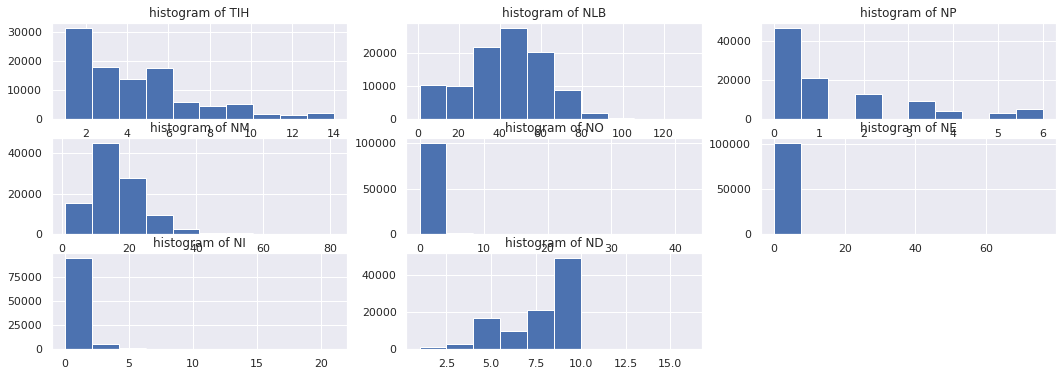

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


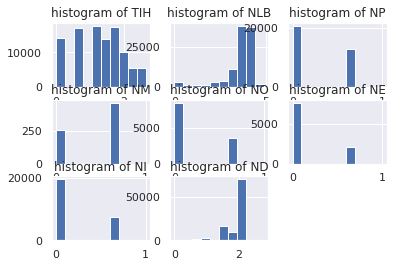

In [304]:
plt.figure(figsize=(18,6))

# histograms of the original data (input variables)
plt.subplot(3, 3, 1)
plt.hist(df['time_in_hospital'])
plt.title("histogram of TIH")

plt.subplot(3, 3, 2)
plt.hist(df['num_lab_procedures'])
plt.title("histogram of NLB")

plt.subplot(3, 3, 3)
plt.hist(df['num_procedures'])
plt.title("histogram of NP")


plt.subplot(3, 3, 4)
plt.hist(df['num_medications'])
plt.title("histogram of NM")

plt.subplot(3, 3, 5)
plt.hist(df['number_outpatient'])
plt.title("histogram of NO")

plt.subplot(3, 3, 6)
plt.hist(df['number_emergency'])
plt.title("histogram of NE")


plt.subplot(3, 3, 7)
plt.hist(df['number_inpatient'])
plt.title("histogram of NI")

plt.subplot(3, 3, 8)
plt.hist(df['number_diagnoses'])
plt.title("histogram of ND")
plt.show()

# histograms of the log transformed data
plt.subplot(3, 3, 1)
plt.hist(np.log(df['time_in_hospital']))
plt.title("histogram of TIH")

plt.subplot(3, 3, 2)
plt.hist(np.log(df['num_lab_procedures']))
plt.title("histogram of NLB")

plt.subplot(3, 3, 3)
plt.hist(np.log(df['num_procedures']), range = (0,1))
plt.title("histogram of NP")


plt.subplot(3, 3, 4)
plt.hist(np.log(df['num_medications']), range = (0,1))
plt.title("histogram of NM")

plt.subplot(3, 3, 5)
plt.hist(np.log(df['number_outpatient']),range = (0,1))
plt.title("histogram of NO")

plt.subplot(3, 3, 6)
plt.hist(np.log(df['number_emergency']),range = (0,1))
plt.title("histogram of NE")


plt.subplot(3, 3, 7)
plt.hist(np.log(df['number_inpatient']),range = (0,1))
plt.title("histogram of NI")

plt.subplot(3, 3, 8)
plt.hist(np.log(df['number_diagnoses']))
plt.title("histogram of ND")
plt.show()

#Make sure you demonstrate each of the statistical tests and each type of graph at least once. Experiment with different ways of achieving the same type of graph. There are many ways to get the same result, and it’s good to have many in your toolbox